# Test Model 0

\begin{center}
    % Do a TixZ diagram of a 2 states model
    \begin{tikzpicture}[node distance=2cm, auto]
        \node (1) [rectangle, draw, minimum size=1.5cm] {1};
        \node (2) [rectangle, draw, minimum size=1.5cm, right of=1, xshift=1cm] {2};

        % Arrows
        \draw[->] ++(0.75,-0.25) -- node[midway, below] {$\lambda_{12}$} ++(1.5, 0);
        \draw[->] (2.south) -- node[midway, left] {$\delta_2$} ++(0,-1);
        \draw[->] (1.south) -- node[midway, left] {$\delta_1$} ++(0,-1);
        \draw[->] ++(2.25,0.25) -- node[midway, above] {$\lambda_{21}$} ++(-1.5, 0) ;
    \end{tikzpicture}
\end{center}

2 state model, with 2 giving birth to n 1, and 1 transitioning to 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [4]:
death1 = 0.004
comp = 0.005
death2 = 0.08
lambda12 = 0.05
lambda21 = 0.25
n = 10

equilibrium = (n * lambda21 * lambda12 / death2 - death1 - lambda12)/comp
print("Equilibrium = ", equilibrium)

Xinit = [np.round(equilibrium * 0.75), np.round((lambda12/death2) * equilibrium * 0.75)]

Tmax = 100

Equilibrium =  301.7


## First case : only coeff and deterministic convergence

### Birth death process

In [5]:
# Define the birth-death process
def bd(X1init, X2init, death1, comp, death2, lambda12, lambda21, n, Tmax, K = 1):
    t = [0]
    X1 = [X1init/K]
    X2 = [X2init/K]
    x1 = X1[-1]
    x2 = X2[-1]
    while t[-1] < Tmax:
        if x1 + x2 == 0:
            print("only death remains")
            return t, X1, X2
        tot_rate = (death1 + lambda12 + comp * K * x1) * K * x1 + (death2 + lambda21) * K * x2 
        if tot_rate <= 0:
            print("only death remains")
            return t, X1, X2
        p = np.random.rand()

        if p < (lambda12 * x1) * K / tot_rate:
            x1 -= 1/K  # Transi to 2
            x2 += 1/K
        elif p < ((death1 + comp * K * x1 + lambda12) * x1) * K / tot_rate:
            x1 -= 1/K  # Death of 1
        elif p < ((death1 + comp * K * x1 + lambda12) * x1 + lambda21 * x2) * K / tot_rate:
            x1 += n/K  # Birth of 1
        else:
            x2 -= 1/K  # Death of 2
        X1.append(x1)
        X2.append(x2)
        t.append(t[-1] + np.random.exponential(1 / (tot_rate)))
    return t, X1, X2

In [6]:
# Run the simulation
tbd = []
X1bd = []
X2bd = []
tbd, X1_temp, X2_temp = bd(Xinit[0], Xinit[1], death1, comp, death2, lambda12, lambda21, n, Tmax)
X1bd = X1_temp
X2bd = X2_temp
Xbd = [X1bd[i] + X2bd[i] for i in range(len(X1bd))]

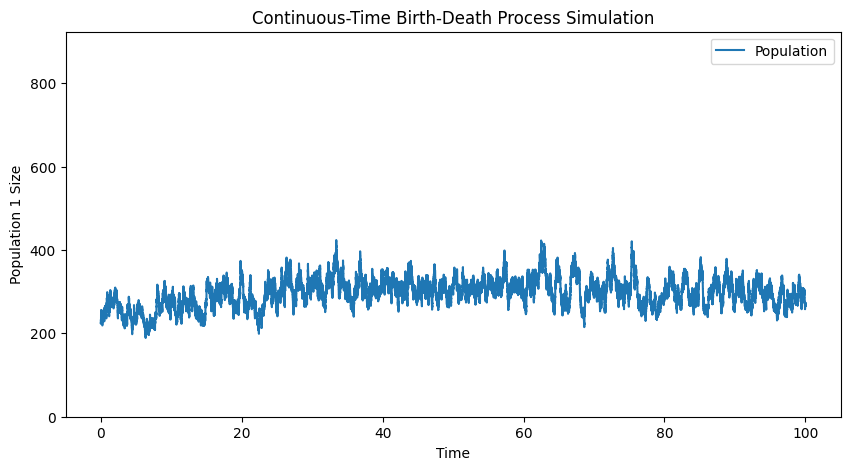

In [7]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.step(tbd, X1bd, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.ylim(0, max(X1bd) + 500)
plt.legend()
plt.show()

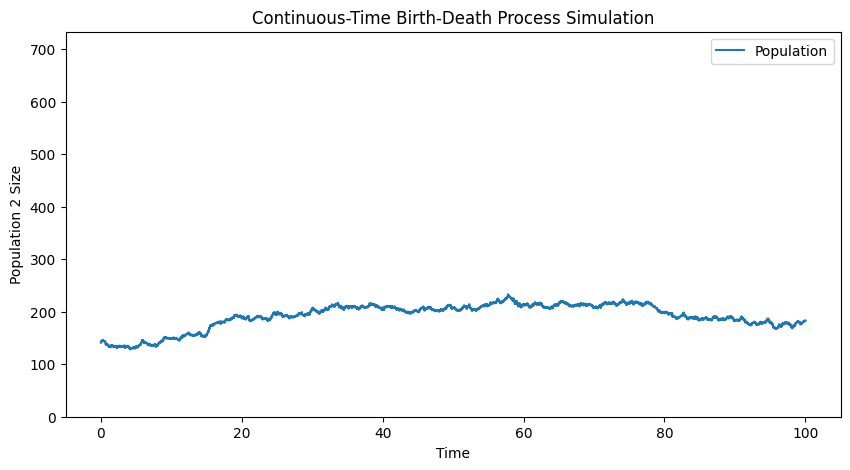

In [8]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.step(tbd, X2bd, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population 2 Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.ylim(0, max(X2bd) + 500)
plt.legend()
plt.show()

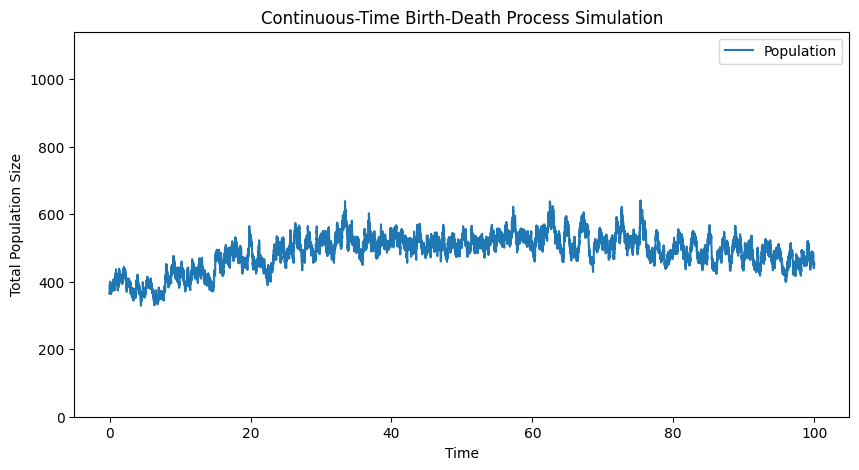

In [9]:
# Plot the SDE results
plt.figure(figsize=(10, 5))
plt.plot(tbd,Xbd, label='Population')
plt.xlabel('Time')
plt.ylabel('Total Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation' )
plt.ylim(0, max(Xbd) + 500)
plt.legend()
plt.show()

### Deterministic model

In [10]:
# Define the associated ODE system
def ode(X, t, death1, comp, death2, lambda12, lambda21, n):
    X1, X2 = X
    dX1dt = n * lambda21 * X2 - (death1 + comp * X1 + lambda12) * X1
    dX2dt = lambda12 * X1 - death2 * X2
    return [dX1dt, dX2dt]

# Define the time points for the ODE solution
interval = np.linspace(0, Tmax, 60000)

# Solve the ODE system
def ode_sim(interval, X1, X2, death1, comp, death2, lambda12, lambda21, n):
    X = odeint(ode, [X1, X2], interval, args=(death1, comp, death2, lambda12, lambda21, n))
    return X[:, 0], X[:, 1]

In [11]:
# Run the ODE simulation
X1_ode, X2_ode = ode_sim(interval, Xinit[0], Xinit[1], death1, comp, death2, lambda12, lambda21, n)

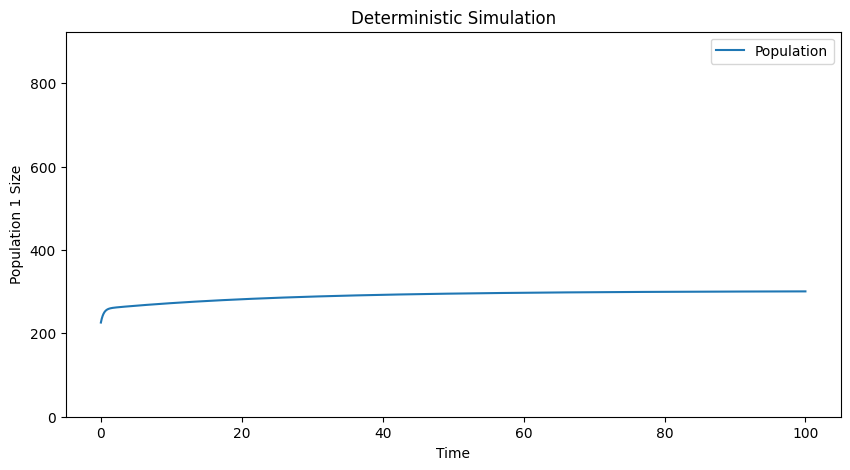

In [12]:
# Plot the ODE results
plt.figure(figsize=(10, 5))
plt.plot(interval, X1_ode, label='Population')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Deterministic Simulation')
plt.ylim(0, max(X1bd) + 500)
plt.legend()
plt.show()

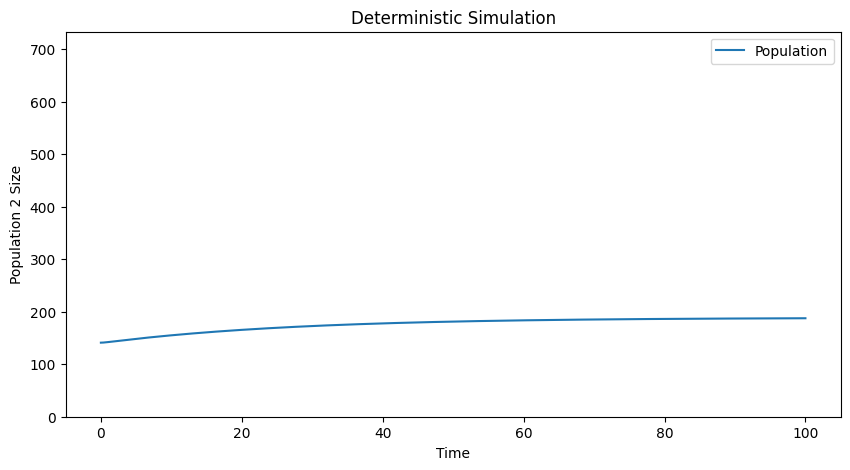

In [13]:
# Plot the ODE results
plt.figure(figsize=(10, 5))
plt.plot(interval, X2_ode, label='Population')
plt.xlabel('Time')
plt.ylabel('Population 2 Size')
plt.title('Deterministic Simulation')
plt.ylim(0, max(X2bd) + 500)
plt.legend()
plt.show()

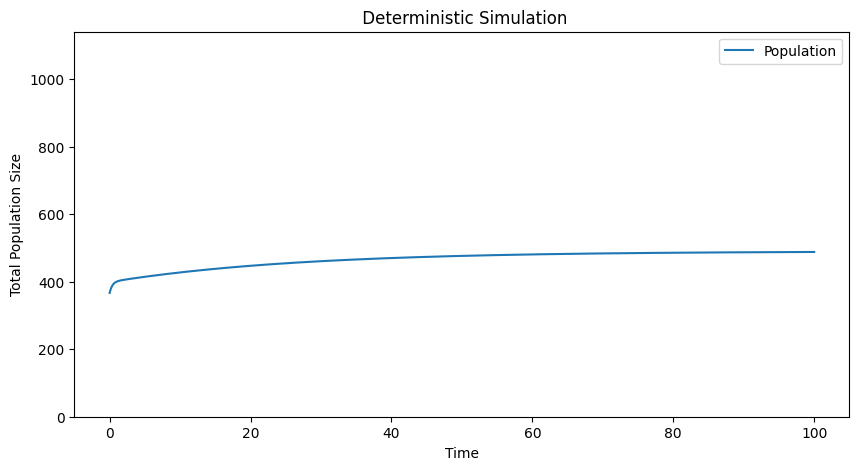

In [14]:
# Plot the SDE results
plt.figure(figsize=(10, 5))
plt.plot(interval, [X1_ode[i] + X2_ode[i] for i in range(len(X1_ode))], label='Population')
plt.xlabel('Time')
plt.ylabel('Total Population Size')
plt.title(' Deterministic Simulation')
plt.ylim(0, max(Xbd) + 500)
plt.legend()
plt.show()

## K order BD process

In [15]:
Tmax = 100

In [16]:
K = 400
gamma12 = lambda12
gamma1 =  death1
gamma2 =  death2 
gamma21 =  (gamma1 + gamma12) * gamma2 /(n * gamma12)
print("gamma21 = ", gamma21)
    
if (gamma12/gamma2 != (gamma1 + gamma12)/(n*gamma21)):
    print("The condition at the Kth order is not satisfied.")
    print("gamma12/gamma2 = ", gamma12/gamma2)
    print("(gamma1 + gamma12)/(n*gamma21) = ", (gamma1 + gamma12)/(n*gamma21))
    exit(1)

gamma21 =  0.008640000000000002
The condition at the Kth order is not satisfied.
gamma12/gamma2 =  0.625
(gamma1 + gamma12)/(n*gamma21) =  0.6249999999999999


In [17]:
# Run the simulation
tk = []
X1bdk = []
X2bdk = []
tk, X1bdk, X2bdk = bd(Xinit[0], Xinit[1], death1 + gamma1 * K, comp, death2 + gamma2 * K, lambda12 + gamma12 * K, lambda21 + gamma21 * K, n, Tmax, K)

In [20]:
tk[-10:]

[30.2873494084774,
 30.29606583119173,
 30.300285336444922,
 30.31114441125958,
 30.3419758909895,
 30.347877778611508,
 30.366757524679866,
 30.380103029541875,
 30.402517413441366,
 13184977.623493174]

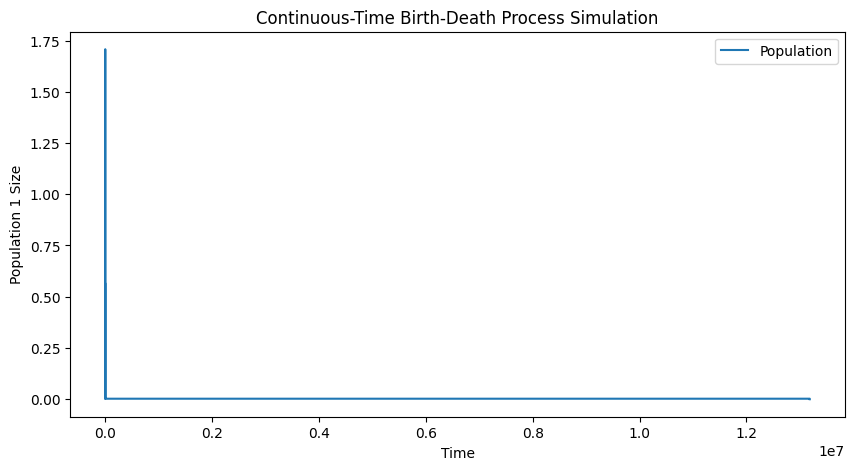

In [19]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.step(tk, X1bdk, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()

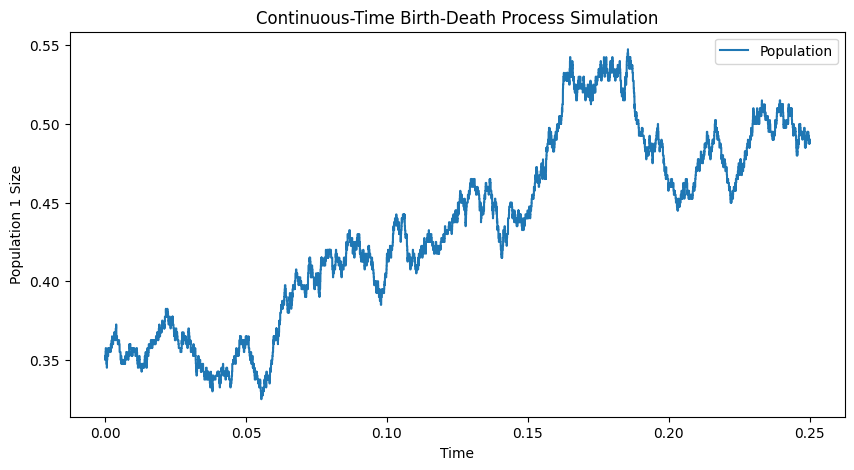

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.step(tk, X2bdk, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()

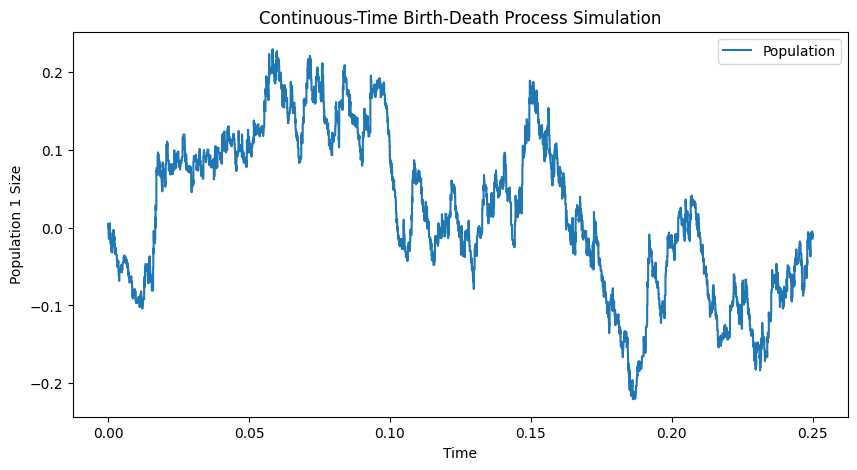

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
import numpy as np
plt.step(tk, np.array(X1bdk) - np.array(X2bdk) * gamma2/gamma12, where="post", label='Population')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Continuous-Time Birth-Death Process Simulation')
plt.legend()
plt.show()

## Second case : slow-fast convergence

Using the generator of the new birth death process, the limit stochastic diffusion for the total population 1+2 is given by
$$dS_t = \frac{\gamma_{12}(n\lambda_{21}-\delta_2) - \gamma_2 \delta_1}{\gamma_{12}+\gamma_2}S_t dt + \sqrt{(n+1)n \frac{\gamma_{21}\gamma_{12}}{\gamma_{12} + \gamma_2} S_t} dB_t$$

In [ ]:
# Define the stochastic diffusion using Euler- scheme
coeff_diff = (n+1)* gamma2 *  (gamma12 + gamma1) / (gamma12 + gamma2)
coeff_drift = (gamma12 * (n * lambda21 - death2) - gamma2 * death1) / (gamma12 + gamma2)

In [ ]:
coeff_drift * (gamma12 + gamma2)**2 / (comp * K * gamma2**2)

1.2256562500000001

In [ ]:
(gamma12 + gamma2)/(gamma2 )

1.625

In [ ]:
# Define the SDE function
def sde(X, coeff_drift, coeff_diff, dt):
    dX = (coeff_drift - (gamma2 * gamma2 * comp * K * X / (gamma2 + gamma12)**2)) * X * dt  +  np.sqrt(coeff_diff * X) * np.random.normal(0, dt)
    return dX

def sde_sim(X0, Tmax, dt, coeff_drift, coeff_diff):
    t = np.arange(0, Tmax, dt)
    X = np.zeros(len(t))
    X[0] = X0/K
    for i in range(1, len(t)):
        X[i] = max(0, X[i-1] + sde(X[i-1], coeff_drift, coeff_diff, dt))
    return t, X

In [ ]:
# Run the SDE simulation
Tmax = 100
dt = Tmax/60000
X0 = Xinit[0] + Xinit[1]
t_useless, X_sde = sde_sim(X0, Tmax, dt, coeff_drift, coeff_diff)
# Plot the SDE results

In [ ]:
X1_sde = gamma2 / (gamma2 + gamma12) * X_sde
X2_sde = gamma12 / (gamma2 + gamma12) * X_sde

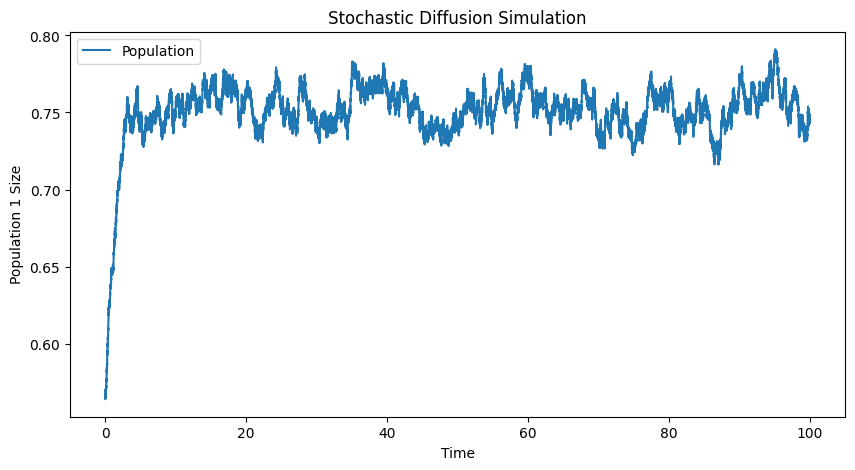

In [ ]:
# Plot X1_sde
plt.figure(figsize=(10, 5))
plt.plot(interval, X1_sde, label='Population')
#plt.ylim(0, max(X1bd) + 500)
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Stochastic Diffusion Simulation')
plt.legend()
plt.show()

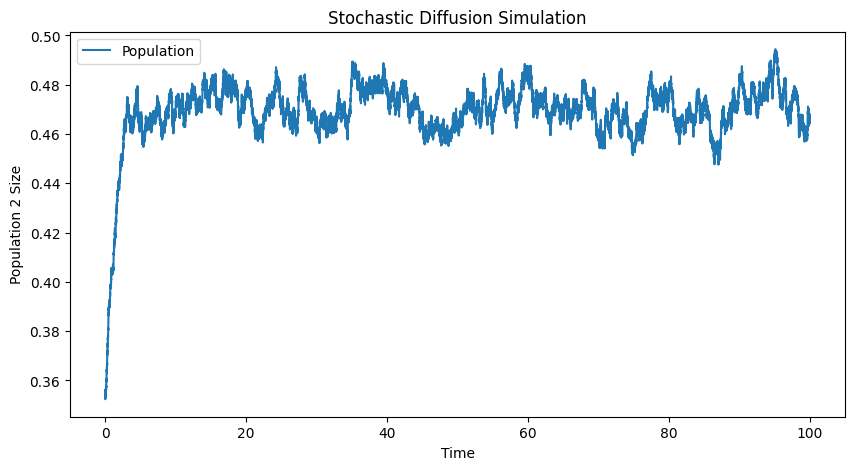

In [ ]:
# Plot X2_sde
plt.figure(figsize=(10, 5))
plt.plot(interval, X2_sde, label='Population')
plt.xlabel('Time')
plt.ylabel('Population 2 Size')
plt.title('Stochastic Diffusion Simulation')
plt.legend()
plt.show()

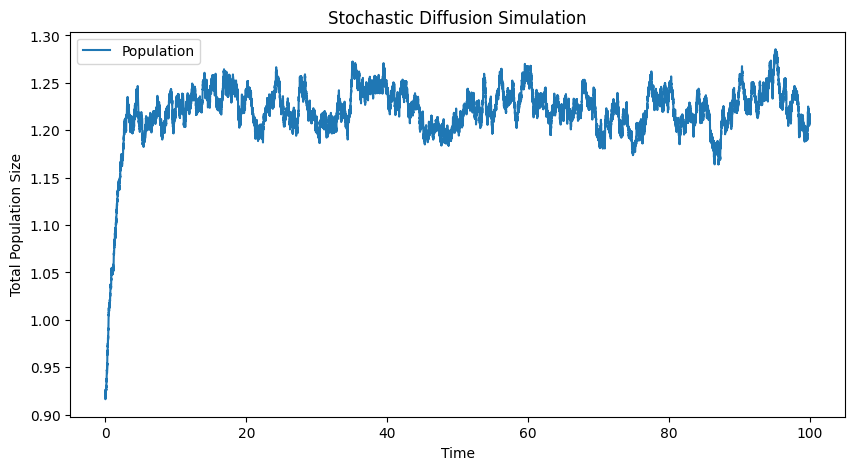

In [ ]:
# Plot the SDE results
plt.figure(figsize=(10, 5))
plt.plot(interval, X_sde, label='Population')
plt.xlabel('Time')
plt.ylabel('Total Population Size')
plt.title('Stochastic Diffusion Simulation')
plt.legend()
plt.show()

## Comparaison ?

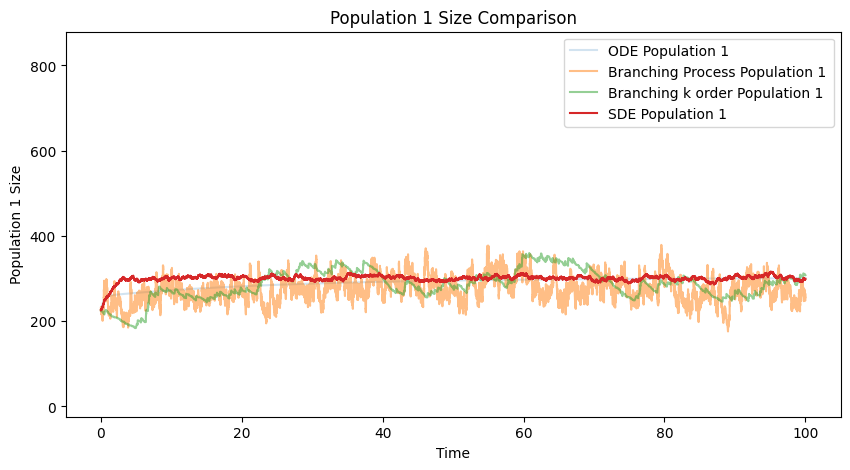

In [ ]:
# Plot the X1
plt.figure(figsize=(10, 5))
plt.plot(interval, X1_ode, alpha=0.2, label='ODE Population 1')
plt.plot(tbd, X1bd, alpha=0.5, label='Branching Process Population 1')
plt.plot(np.array(tk)*K, np.array(X1bdk)*K, alpha=0.5, label='Branching k order Population 1 ')
plt.plot(interval, X1_sde*K, alpha=1, label='SDE Population 1')
plt.xlabel('Time')
plt.ylabel('Population 1 Size')
plt.title('Population 1 Size Comparison')
plt.ylim(min(X1bd) - 200, max(X1bd) + 500)
plt.legend()
plt.show()


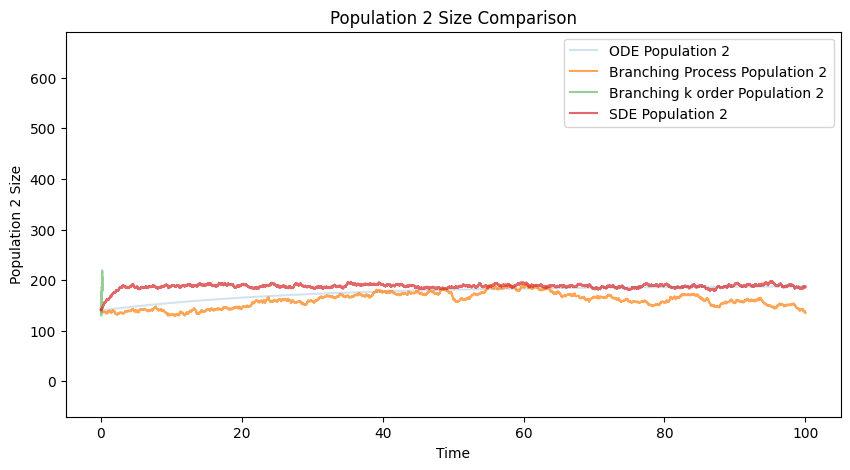

In [ ]:
#Same for X2
plt.figure(figsize=(10, 5))
plt.plot(interval, X2_ode, alpha=0.2, label='ODE Population 2')
plt.plot(tbd, X2bd, alpha=0.7, label='Branching Process Population 2')
plt.plot(tk, np.array(X2bdk)*K, alpha=0.5, label='Branching k order Population 2 ')
plt.plot(interval, X2_sde*K, alpha=0.7, label='SDE Population 2')
plt.xlabel('Time')
plt.ylabel('Population 2 Size')
plt.title('Population 2 Size Comparison')
plt.ylim(min(X2bd) - 200, max(X2bd) + 500)
plt.legend()
plt.show()

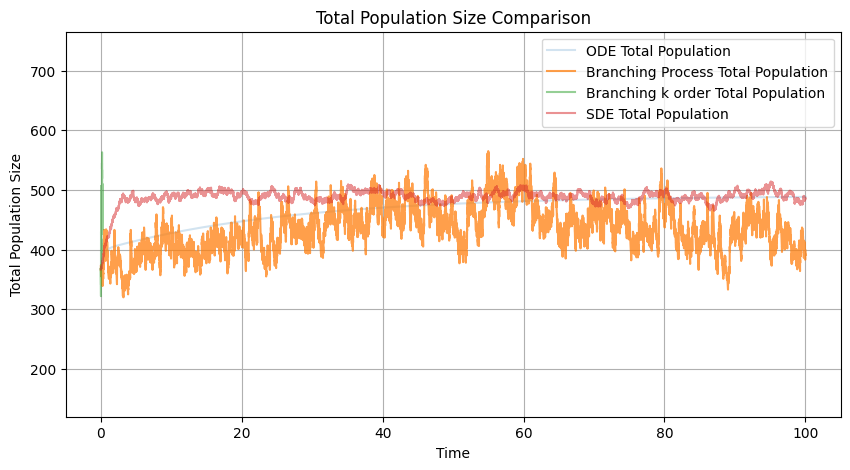

In [ ]:
# Plot the total populations
plt.figure(figsize=(10, 5))
plt.plot(interval, [X1_ode[i] + X2_ode[i] for i in range(len(X1_ode))], alpha=0.2, label='ODE Total Population')
plt.plot(tbd, [X1bd[i] + X2bd[i] for i in range(len(X1bd))], alpha=0.75, label='Branching Process Total Population')
plt.plot(tk, [(X1bdk[i] + X2bdk[i])*K for i in range(len(X1bdk))], alpha=0.5, label='Branching k order Total Population')
plt.plot(interval, X_sde*K, alpha=0.5, label='SDE Total Population')
plt.xlabel('Time')
plt.ylabel('Total Population Size')
plt.title('Total Population Size Comparison')
plt.ylim(min([X1bd[i] + X2bd[i] for i in range(len(X1bd))]) - 200, max([X1bd[i] + X2bd[i] for i in range(len(X1bd))]) + 200)
plt.legend()
plt.grid(True)
plt.show()